<a href="https://colab.research.google.com/github/KYY-1230/blank-app/blob/main/imdb_dl_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_reviews.csv to cleaned_reviews.csv


In [9]:
# ✅ 1. 安装必要库（Colab 环境默认安装了 TensorFlow，可跳过）
# 如果本地用 Jupyter Notebook，则取消注释下面一行：
# !pip install tensorflow scikit-learn

# ✅ 2. 引入库
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf

# ✅ 3. 模拟数据（请替换成你真实的数据）
df = pd.read_csv("cleaned_reviews.csv")
texts = df['cleaned_review'].astype(str)
labels = df['sentiment'].astype(int)

# ✅ 4. 预处理
vocab_size = 10000
maxlen = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# ✅ 5. 构建 RNN 模型
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
model.add(SimpleRNN(units=128, return_sequences=False))  # RNN 层
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ✅ 6. 模型训练（GPU 环境大概几分钟就跑完）
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ 7. 性能对比（Accuracy、Precision、Recall）
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"🔍 Accuracy: {acc:.4f}")
print(f"🔍 Precision: {prec:.4f}")
print(f"🔍 Recall: {rec:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 100ms/step - accuracy: 0.5006 - loss: 0.7156 - val_accuracy: 0.5042 - val_loss: 0.7020
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 97ms/step - accuracy: 0.5036 - loss: 0.7184 - val_accuracy: 0.5044 - val_loss: 0.6931
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 49s 98ms/step - accuracy: 0.5144 - loss: 0.6984 - val_accuracy: 0.5074 - val_loss: 0.6932
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 80s 94ms/step - accuracy: 0.5251 - loss: 0.6903 - val_accuracy: 0.5090 - val_loss: 0.7029
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 48s 96ms/step - accuracy: 0.5511 - loss: 0.6681 - val_accuracy: 0.5101 - val_loss: 0.7132
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
🔍 Accuracy: 0.5165
🔍 Precision: 0.5207
🔍 Recall: 0.5088


In [12]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import EarlyStopping

# 定义模型
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=maxlen))
model.add(GRU(units=128, return_sequences=False))  # GRU 替代 SimpleRNN
model.add(Dropout(0.5))  # 增加 Dropout 防止过拟合
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',  # 监控验证集的损失
                               patience=3,        # 容忍验证集损失没有改善的训练轮数
                               restore_best_weights=True)  # 恢复最佳模型权重
# 训练模型
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 201s 395ms/step - accuracy: 0.5008 - loss: 0.6937 - val_accuracy: 0.5031 - val_loss: 0.6925
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 198s 388ms/step - accuracy: 0.5229 - loss: 0.6873 - val_accuracy: 0.5192 - val_loss: 0.7091
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 210s 404ms/step - accuracy: 0.5662 - loss: 0.6424 - val_accuracy: 0.5098 - val_loss: 0.7132
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 406ms/step - accuracy: 0.5892 - loss: 0.6422 - val_accuracy: 0.5121 - val_loss: 0.7345


In [18]:
from tensorflow.keras.optimizers import Adam
model = Sequential()
embedding_dim = 128
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(GRU(units=64, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))
model.add(GRU(units=32, dropout=0.3, recurrent_dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

x_train, x_temp, y_train, y_temp = train_test_split(padded_sequences, labels, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# 编译模型
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0005),
    metrics=['accuracy']
)

# 早停机制
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

# 模型训练
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# 模型预测
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# 模型评估
acc = accuracy_score(y_test, y_pred_labels)
prec = precision_score(y_test, y_pred_labels)
rec = recall_score(y_test, y_pred_labels)

print(f"🔍 Accuracy: {acc:.4f}")
print(f"🔍 Precision: {prec:.4f}")
print(f"🔍 Recall: {rec:.4f}")
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred_labels))

Epoch 1/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 269s 476ms/step - accuracy: 0.5012 - loss: 0.6941 - val_accuracy: 0.5039 - val_loss: 0.6928
Epoch 2/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 263s 478ms/step - accuracy: 0.5281 - loss: 0.6910 - val_accuracy: 0.5227 - val_loss: 0.6885
Epoch 3/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 259s 474ms/step - accuracy: 0.5465 - loss: 0.6820 - val_accuracy: 0.5203 - val_loss: 0.6900
Epoch 4/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 263s 477ms/step - accuracy: 0.5347 - loss: 0.6854 - val_accuracy: 0.5161 - val_loss: 0.6876
Epoch 5/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 262s 478ms/step - accuracy: 0.5673 - loss: 0.6500 - val_accuracy: 0.5479 - val_loss: 0.7988
Epoch 6/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 258s 471ms/step - accuracy: 0.6555 - loss: 0.6123 - val_accuracy: 0.6727 - val_loss: 0.5792
Epoch 7/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 263s 473ms/step - accuracy: 0.7178 - loss: 0.5359 - val_accuracy: 0.8180 - val_loss: 0.4086
Epoch 8/10
547/547 ━━━━━━━━━━━━━━━━━━━━ 262s 473ms/step - accuracy: 0.8545 -

NameError: name 'classification_report' is not defined

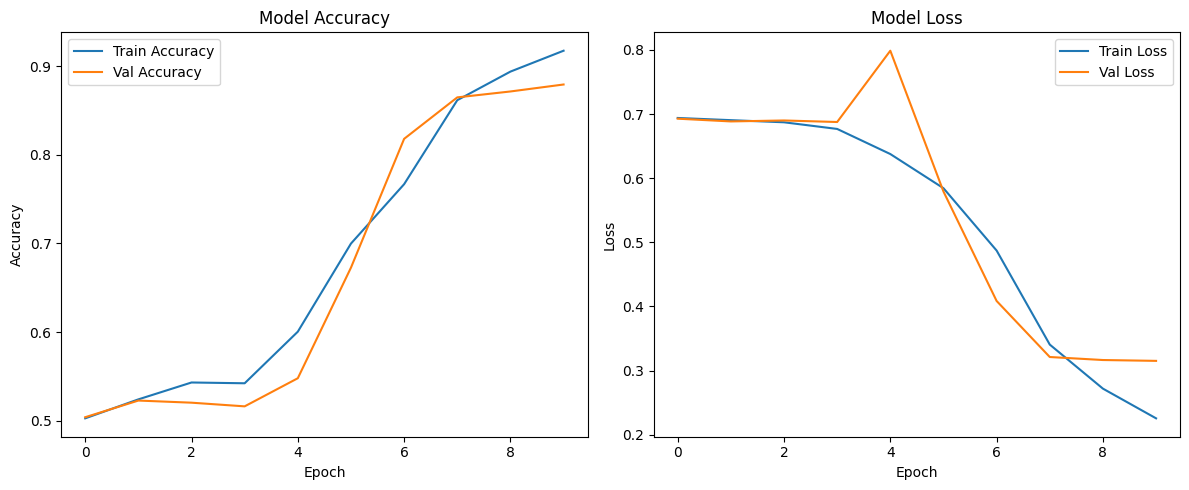

In [19]:
import matplotlib.pyplot as plt

# 准确率
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 损失
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


235/235 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step


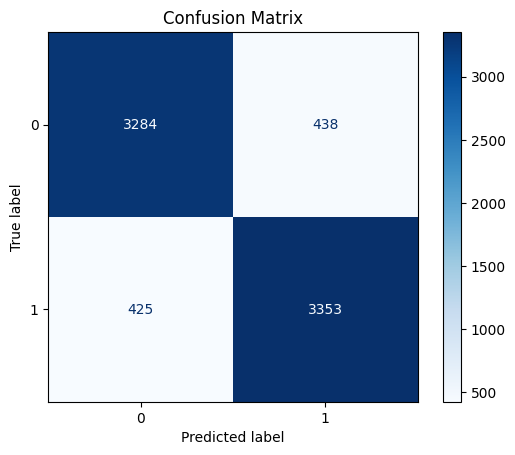

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# 预测类别（如果是 binary 是 0 或 1）
y_pred = model.predict(x_test)
y_pred_classes = np.round(y_pred)  # 如果是 sigmoid 输出

# 混淆矩阵
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [21]:
model.save("my_best_gru_model.h5")
